In [104]:
 ## imports
import re
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text
from sklearn.metrics import mean_squared_error
from math import sqrt

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [105]:
df = pd.read_csv('housing.csv')

In [106]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [107]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [108]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [109]:
selected = [ 
    'latitude', 'longitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income','median_house_value','ocean_proximity' 
]

In [110]:
df[selected].isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [111]:
df.total_bedrooms = df.total_bedrooms.fillna(0)

In [112]:
df[selected].isnull().sum()

latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

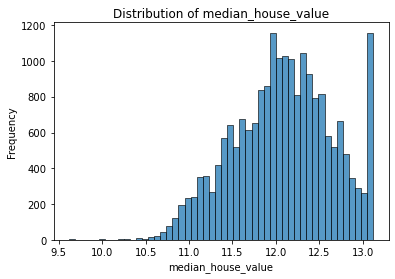

In [113]:
prices = np.log1p(df.median_house_value) 
plt.figure(figsize=(6, 4))
sns.histplot(prices, bins=50)
plt.ylabel('Frequency')
plt.xlabel('median_house_value')
plt.title('Distribution of median_house_value')

plt.show()

In [114]:
df.median_house_value = np.log1p(df.median_house_value)

In [115]:
#Do train/validation/test split with 60%/20%/20% distribution.

#Use the train_test_split function and set the random_state parameter to 1.

df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)

In [116]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [117]:
y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

In [118]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']


In [119]:
#Use DictVectorizer to turn the dataframe into matrices.
dict_train = df_train.fillna(0).to_dict(orient='records')
dict_val = df_val.fillna(0).to_dict(orient='records')

In [120]:
dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(dict_train)
X_val = dv.transform(dict_val)

In [121]:
dv.get_feature_names_out()

array(['households', 'housing_median_age', 'latitude', 'longitude',
       'median_income', 'ocean_proximity=<1H OCEAN',
       'ocean_proximity=INLAND', 'ocean_proximity=ISLAND',
       'ocean_proximity=NEAR BAY', 'ocean_proximity=NEAR OCEAN',
       'population', 'total_bedrooms', 'total_rooms'], dtype=object)

## Q.1 Let's train a decision tree regressor to predict the median_house_value variable.

   -  Train a model with max_depth=1.

    - Which feature is used for splitting the data?

In [122]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [123]:
y_pred = dt.predict(X_train)
y_pred

array([11.61333344, 11.61333344, 12.30674657, ..., 12.30674657,
       11.61333344, 11.61333344])

In [124]:
print(export_text(dt, feature_names = dv.get_feature_names()))

|--- ocean_proximity=INLAND <= 0.50
|   |--- value: [12.31]
|--- ocean_proximity=INLAND >  0.50
|   |--- value: [11.61]



C:\Users\Olga\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Answer to Q.1. - ocean_proximity=INLAND

## Q.2 Train a random forest model with these parameters:

    - n_estimators=10
    - random_state=1
   -  n_jobs=-1 (optional - to make training faster)

 - What's the RMSE of this model on validation?

In [95]:
rf = RandomForestRegressor(n_estimators = 10, random_state = 1, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [96]:
y_pred = rf.predict(X_val)

In [97]:
rms = sqrt(mean_squared_error(y_val, y_pred))
round(rms,2)

0.25

## Answer to Q.2 - rmse = 0.25

## Q.3 Now let's experiment with the n_estimators parameter

     - Try different values of this parameter from 10 to 200 with step 10.
     - Set random_state to 1.
    - Evaluate the model on the validation dataset.

- After which value of n_estimators does RMSE stop improving?

In [81]:
scores = []

for i in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=i, random_state=1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    score  = sqrt(mean_squared_error(y_val, y_pred))
    print('%s -> %.3f' % (i, score))
    scores.append((i,score))

10 -> 0.246
20 -> 0.239
30 -> 0.236
40 -> 0.235
50 -> 0.233
60 -> 0.233
70 -> 0.232
80 -> 0.233
90 -> 0.232
100 -> 0.232
110 -> 0.232
120 -> 0.232
130 -> 0.232
140 -> 0.232
150 -> 0.232
160 -> 0.232
170 -> 0.232
180 -> 0.232
190 -> 0.232
200 -> 0.232


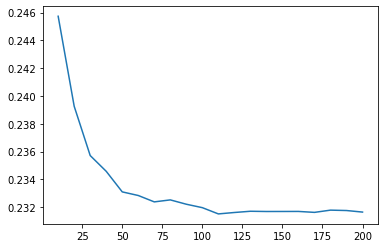

In [82]:
df_scores = pd.DataFrame(scores, columns = ['n_estimators', 'rmse'])
plt.plot(df_scores.n_estimators,df_scores.rmse )

## Answer ro Q.3 - after n_estimators = 150

## Q.4 Let's select the best max_depth:

   -  Try different values of max_depth: [10, 15, 20, 25]
   -  For each of these values, try different values of n_estimators from 10 till 200 (with step 10)
  -   Fix the random seed: random_state=1

- What's the best max_depth:

In [101]:
all_scores = {}

for depth in [ 10, 15, 20, 25]:
    print('max depth: %s' % depth)
    scores = []
    for i in range(10, 201, 10):
        rf = RandomForestRegressor(n_estimators=i, max_depth=depth, random_state=1)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_val)
        score  = sqrt(mean_squared_error(y_val, y_pred))
        print('%s -> %.3f' % ( i, score))

        scores.append(score)
        all_scores[depth] = scores
    print()

max depth: 10
10 -> 0.255
20 -> 0.253
30 -> 0.252
40 -> 0.251
50 -> 0.250
60 -> 0.250
70 -> 0.250
80 -> 0.250
90 -> 0.249
100 -> 0.249
110 -> 0.249
120 -> 0.249
130 -> 0.249
140 -> 0.249
150 -> 0.249
160 -> 0.249
170 -> 0.249
180 -> 0.249
190 -> 0.249
200 -> 0.249

max depth: 15
10 -> 0.245
20 -> 0.239
30 -> 0.237
40 -> 0.236
50 -> 0.235
60 -> 0.235
70 -> 0.234
80 -> 0.234
90 -> 0.234
100 -> 0.234
110 -> 0.233
120 -> 0.233
130 -> 0.233
140 -> 0.233
150 -> 0.233
160 -> 0.233
170 -> 0.233
180 -> 0.233
190 -> 0.233
200 -> 0.233

max depth: 20
10 -> 0.246
20 -> 0.239
30 -> 0.236
40 -> 0.235
50 -> 0.233
60 -> 0.233
70 -> 0.233
80 -> 0.233
90 -> 0.233
100 -> 0.232
110 -> 0.232
120 -> 0.232
130 -> 0.232
140 -> 0.232
150 -> 0.232
160 -> 0.232
170 -> 0.232
180 -> 0.232
190 -> 0.232
200 -> 0.232

max depth: 25
10 -> 0.246
20 -> 0.239
30 -> 0.235
40 -> 0.234
50 -> 0.233
60 -> 0.233
70 -> 0.232
80 -> 0.232
90 -> 0.232
100 -> 0.232
110 -> 0.231
120 -> 0.231
130 -> 0.232
140 -> 0.231
150 -> 0.232
16

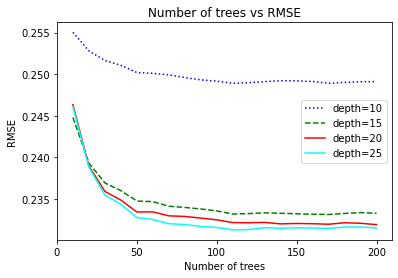

In [102]:
plt.figure(figsize=(6, 4))

num_trees = list(range(10, 201, 10))

plt.plot(num_trees, all_scores[10], label='depth=10', color='blue', linestyle='dotted')
plt.plot(num_trees, all_scores[15], label='depth=15', color='green', linestyle='dashed')
plt.plot(num_trees, all_scores[20], label='depth=20', color='red', linestyle='solid')
plt.plot(num_trees, all_scores[25], label='depth=25', color='cyan', linestyle='solid')    
plt.xticks(range(0, 201, 50))
plt.legend()

plt.title('Number of trees vs RMSE')
plt.xlabel('Number of trees')
plt.ylabel('RMSE')

# plt.savefig('ch06-figures/06_random_forest_n_estimators_depth.svg')

plt.show()

## Answer  Best max_dept = 25

## Q.5 We can extract feature importance information from tree-based models.

 - At each step of the decision tree learning algorith, it finds the best split. When doint it, we can calculate "gain" - the reduction in impurity before and after the split. This gain is quite useful in understanding what are the imporatant features for tree-based models.

 - In Scikit-Learn, tree-based models contain this information in the feature_importances_ field.

For this homework question, we'll find the most important feature:

    Train the model with these parametes:
        n_estimators=10,
        max_depth=20,
        random_state=1,
        n_jobs=-1 (optional)
    Get the feature importance information from this model

What's the most important feature?

    total_rooms
    median_income
    total_bedrooms
    longitude


In [98]:
rf = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
score  = sqrt(mean_squared_error(y_val, y_pred))
print(' %.3f' % score)

 0.246


In [153]:
importances = list(zip(dv.feature_names_, rf.feature_importances_))

df_importance = pd.DataFrame(importances, columns=['feature', 'gain'])
df_importance = df_importance.sort_values(by='gain', ascending=False)
df_importance

feature      gain
4                median_income  0.362913
6       ocean_proximity=INLAND  0.310901
2                     latitude  0.101334
3                    longitude  0.096265
1           housing_median_age  0.033094
10                  population  0.030918
12                 total_rooms  0.020536
11              total_bedrooms  0.019041
0                   households  0.016957
9   ocean_proximity=NEAR OCEAN  0.004228
5    ocean_proximity=<1H OCEAN  0.003007
8     ocean_proximity=NEAR BAY  0.000449
7       ocean_proximity=ISLAND  0.000357

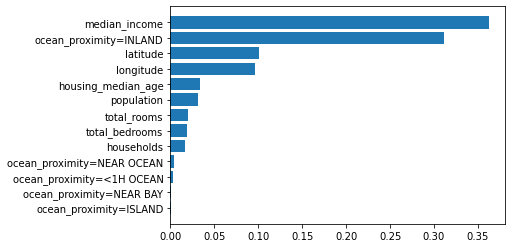

In [154]:
num = len(df_importance)
plt.barh(range(num), df_importance.gain[::-1])
plt.yticks(range(num), df_importance.feature[::-1])

plt.show()

## Answer to Q.5- the most important feature is median_income

## Q. 6 Now let's train an XGBoost model! For this question, we'll tune the eta parameter:

    Install XGBoost
    Create DMatrix for train and validation
    Create a watchlist
    Train a model with these parameters for 100 rounds:


In [2]:
import xgboost as xgb

In [120]:
!pip install xgboost

In [146]:
#features = dv.get_feature_names_#

features = dv.feature_names_

regex = re.compile(r"<", re.IGNORECASE)
features = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in features]
features

['households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=_1H OCEAN',
 'ocean_proximity=INLAND',
 'ocean_proximity=ISLAND',
 'ocean_proximity=NEAR BAY',
 'ocean_proximity=NEAR OCEAN',
 'population',
 'total_bedrooms',
 'total_rooms']

In [127]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [128]:
## params
eta = 0.3
n_rounds = 100
watchlist= [(dtrain, 'dtrain'), (dval, 'dval')]

In [72]:
def gradient_boost(eta, n_rounds):
    xgb_params = {
        'eta': eta, 
        'max_depth': 6,
        'min_child_weight': 1,
        'objective': 'reg:squarederror',
        'nthread': 8,
        'seed': 1,
        'verbosity': 1
    }
    model = xgb.train(xgb_params, dtrain, num_boost_round =n_rounds, verbose_eval = 5, evals =watchlist)
    y_pred = model.predict(dval)
    score  = sqrt(mean_squared_error(y_val, y_pred))
    return score

In [73]:
eta = 0.3
gradient_boost(eta, n_rounds)
print('eta = %.3f, rmse =  %.3f' % (eta, score))
eta = 0.1
gradient_boost(eta, n_rounds)
print('eta = %.3f, rmse =  %.3f' % (eta, score))

[0]	dtrain-rmse:8.12733	dval-rmse:8.13245
[5]	dtrain-rmse:1.40218	dval-rmse:1.40741
[10]	dtrain-rmse:0.34481	dval-rmse:0.35782
[15]	dtrain-rmse:0.23555	dval-rmse:0.26044
[20]	dtrain-rmse:0.21580	dval-rmse:0.24624
[25]	dtrain-rmse:0.20395	dval-rmse:0.24099
[30]	dtrain-rmse:0.19440	dval-rmse:0.23741
[35]	dtrain-rmse:0.18637	dval-rmse:0.23562
[40]	dtrain-rmse:0.17983	dval-rmse:0.23419
[45]	dtrain-rmse:0.17468	dval-rmse:0.23279
[50]	dtrain-rmse:0.16934	dval-rmse:0.23097
[55]	dtrain-rmse:0.16546	dval-rmse:0.23039
[60]	dtrain-rmse:0.16177	dval-rmse:0.22950
[65]	dtrain-rmse:0.15762	dval-rmse:0.22857
[70]	dtrain-rmse:0.15323	dval-rmse:0.22787
[75]	dtrain-rmse:0.15010	dval-rmse:0.22755
[80]	dtrain-rmse:0.14564	dval-rmse:0.22611
[85]	dtrain-rmse:0.14166	dval-rmse:0.22579
[90]	dtrain-rmse:0.13892	dval-rmse:0.22628
[95]	dtrain-rmse:0.13553	dval-rmse:0.22630
[99]	dtrain-rmse:0.13299	dval-rmse:0.22610
eta = 0.300, rmse =  0.226
[0]	dtrain-rmse:10.44372	dval-rmse:10.44938
[5]	dtrain-rmse:6.17513	dval

## Answer to Q.6 both eta=0.3 and 0.1 give the same RMSE

In [129]:
def parse_xgb_output(output):
    tree = []
    aucs_train = []
    aucs_val = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        tree.append(it)
        aucs_train.append(train)
        aucs_val.append(val)

    return tree, aucs_train, aucs_val

In [130]:
## params
eta = 0.3
n_rounds = 100
watchlist= [(dtrain, 'dtrain'), (dval, 'dval')]

In [131]:
%%capture output

xgb_params = {
    'eta': eta, 
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'reg:squarederror',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1
}
model = xgb.train(xgb_params, dtrain, num_boost_round =n_rounds, verbose_eval = 5, evals = watchlist)


In [133]:
tree, _, rmse_etas03 = parse_xgb_output(output)
print(min(rmse_etas03))
print(min(zip(rmse_etas03, tree)))

0.22579
(0.22579, 85)


In [134]:
eta = 0.1

In [135]:
%%capture output

xgb_params = {
    'eta': eta, 
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'reg:squarederror',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1
}
model = xgb.train(xgb_params, dtrain, num_boost_round =n_rounds, verbose_eval = 5, evals = watchlist)


In [136]:
tree, _, rmse_etas01 = parse_xgb_output(output)
print(min(rmse_etas01))
print(min(zip(rmse_etas01, tree)))

0.23054
(0.23054, 99)


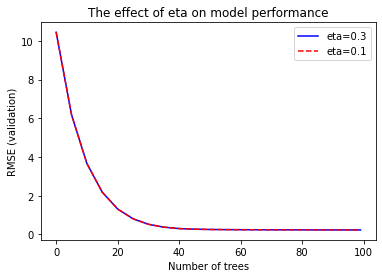

In [140]:
plt.figure(figsize=(6, 4))

plt.plot(tree, rmse_etas01, color='blue', linestyle='solid', label='eta=0.3')
plt.plot(tree, rmse_etas01, color='red', linestyle='dashed', label='eta=0.1')

plt.xticks(range(0, 101, 20))

plt.legend()

plt.title('The effect of eta on model performance')
plt.xlabel('Number of trees')
plt.ylabel('RMSE (validation)')



plt.show()

In [141]:
eta = 0.05

In [142]:
%%capture output

xgb_params = {
    'eta': eta, 
    'max_depth': 6,
    'min_child_weight': 1,
    'objective': 'reg:squarederror',
    'nthread': 8,
    'seed': 1,
    'verbosity': 1
}
model = xgb.train(xgb_params, dtrain, num_boost_round =n_rounds, verbose_eval = 5, evals = watchlist)


In [143]:
tree, _, rmse_etas005 = parse_xgb_output(output)
print(min(rmse_etas005))
print(min(zip(rmse_etas005, tree)))

0.2601
(0.2601, 99)
